# Predicting Social Media Post Engagement

 ## Introduction
This project aims to predict social media post engagement levels based on descriptions and other features. We'll use machine learning to analyze post attributes and predict interaction counts, helping optimize content strategies and improve social media performance.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pickle
import sys
sys.path.append('../SCR/')
from functions import *

2024-08-22 10:08:27.830140: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 10:08:27.833618: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 10:08:27.844028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 10:08:27.866598: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 10:08:27.871270: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 10:08:27.888575: I tensorflow/core/platform/cpu_feature_gu

## 1. Data Collection
 In this step, we load and merge the base dataset with embedded text data.

In [2]:

base_path = 'Data/DF_complete/base.csv'
embedded_paths = [#'../Data/DF_embedded/df_1-embed.csv', 
                  #'../Data/DF_embedded/df_2-embed.csv', '../Data/DF_embedded/df_3-embed.csv', '../Data/DF_embedded/df_4-embed.csv',
                  '../Data/DF_embedded/df_5-embed.csv', '../Data/DF_embedded/df_6-embed.csv','../Data/DF_embedded/df_7-embed.csv', 
                  #'../Data/DF_embedded/df_8-embed.csv', '../Data/DF_embedded/df_9-embed.csv', '../Data/DF_embedded/df_10-embed.csv'
                  ]
# Example of function usage:
base_path = '../Data/DF_complete/base.csv'
merged_data = load_and_merge_datasets(base_path, embedded_paths, sample_size= None, output_path='../Data/Clean-Data/merged_data.csv')

Base Data Loaded:
Shape of the base data: (1000000, 10)


/home/danicoco/Escritorio/IronHack-DataAnalysis/8. week-eight/project/Notebooks/../SCR/functions.py:60: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Data loaded from ../Data/DF_embedded/df_5-embed.csv


/home/danicoco/Escritorio/IronHack-DataAnalysis/8. week-eight/project/Notebooks/../SCR/functions.py:60: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Data loaded from ../Data/DF_embedded/df_6-embed.csv


/home/danicoco/Escritorio/IronHack-DataAnalysis/8. week-eight/project/Notebooks/../SCR/functions.py:60: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Data loaded from ../Data/DF_embedded/df_7-embed.csv
Embedded Data Loaded and Concatenated.
Data merged successfully. Shape of the merged data: (298467, 1034)
Merged data saved to ../Data/Clean-Data/merged_data.csv


## 2. Data Cleaning and Wrangling
Here we handle missing values, filter data, and prepare it for analysis.


In [3]:
data_collected = '../Data/Clean-Data/merged_data.csv'
data_cleaned = '../Data/Clean-Data/cleaned_data.csv'
cleaned_data = clean_and_wrangle_data (data_collected, data_cleaned)

Merged Data Loaded:
Shape of the merged data: (298467, 1034)
Missing values in each column:
 id               0
description      0
interactions     0
day_of_week      0
time_of_day      0
                ..
embedded_1019    0
embedded_1020    0
embedded_1021    0
embedded_1022    0
embedded_1023    0
Length: 1034, dtype: int64
Data after handling missing values:
(298467, 1034)
Data after filtering:
(298467, 1034)
Data after removing outliers:
(198600, 1035)
Cleaned data saved to ../Data/Clean-Data/cleaned_data.csv


## 3. Exploratory Data Analysis (EDA)
We analyze the data distribution, relationships, and key patterns.

Cleaned Data Loaded:
Shape of the cleaned data: (198600, 1039)
Basic Statistical Descriptions:
           followers   interactions      num_posts  description_length
count  198600.000000  198600.000000  198600.000000       198600.000000
mean      791.245498      55.428293     428.110232          135.954718
std       807.945874      48.804377     425.994093          122.490519
min         0.000000       0.000000       0.000000            1.000000
25%       244.000000      19.000000     101.000000           40.000000
50%       526.000000      38.000000     273.000000           93.000000
75%      1037.000000      78.000000     627.000000          200.000000
max      4744.000000     212.000000    1847.000000          517.000000


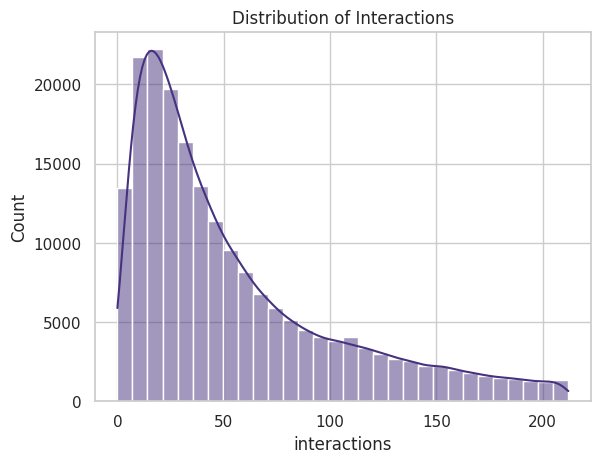

This plot shows the distribution of interaction counts across posts, helping to identify common engagement levels and outliers.


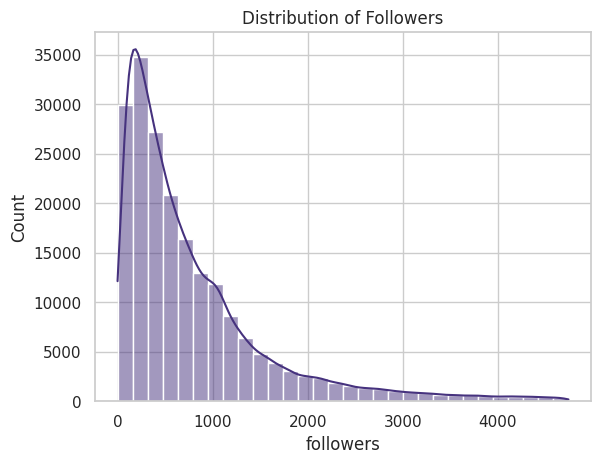

The distribution of followers helps us understand the range and commonality of follower counts within the dataset.


/home/danicoco/Escritorio/IronHack-DataAnalysis/8. week-eight/project/Notebooks/../SCR/functions.py:255: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, palette='viridis')


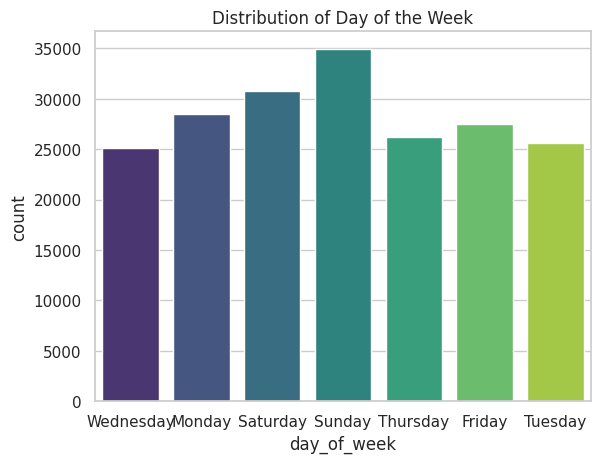

This count plot provides insight into the activity or posting frequency by day of the week, which can influence engagement.


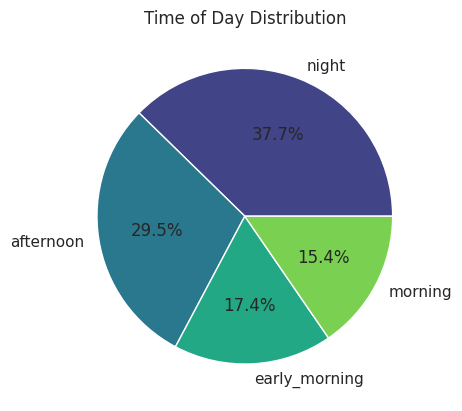

The pie chart of time of day shows when posts are typically made, which is crucial for timing strategies in social media marketing.


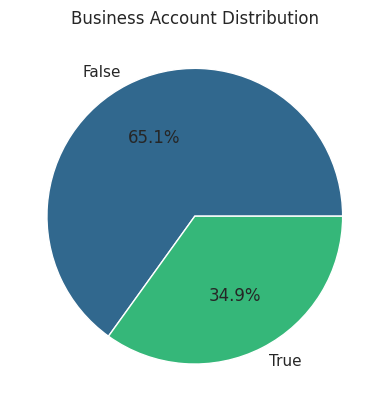

Understanding the proportion of business accounts can help tailor content and marketing strategies to the right audience.


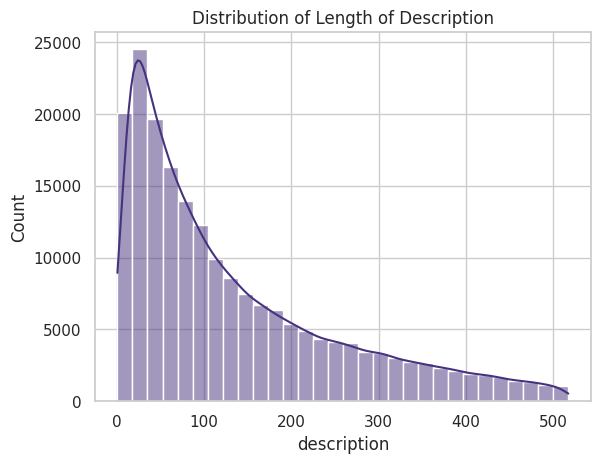

This histogram shows how the length of descriptions varies, which can affect both SEO and user engagement.


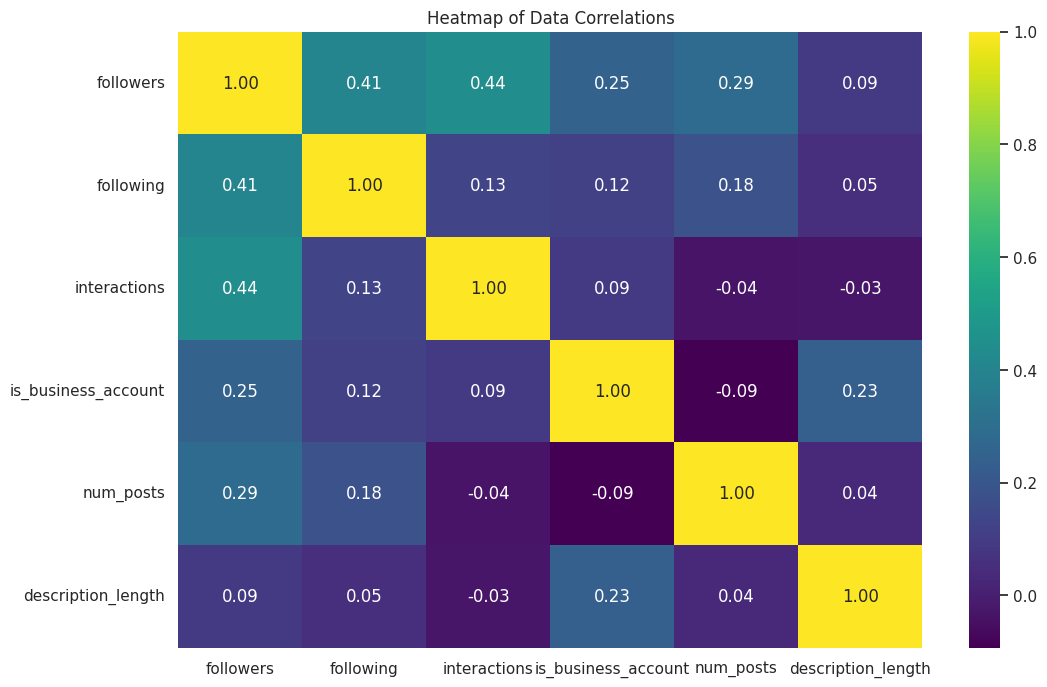

The heatmap illustrates the relationships between numeric variables, highlighting how each variable might affect interactions.


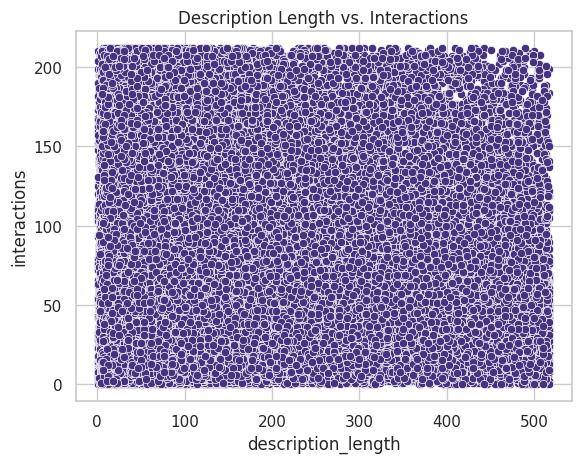

This scatter plot explores the relationship between the length of descriptions and user interactions.


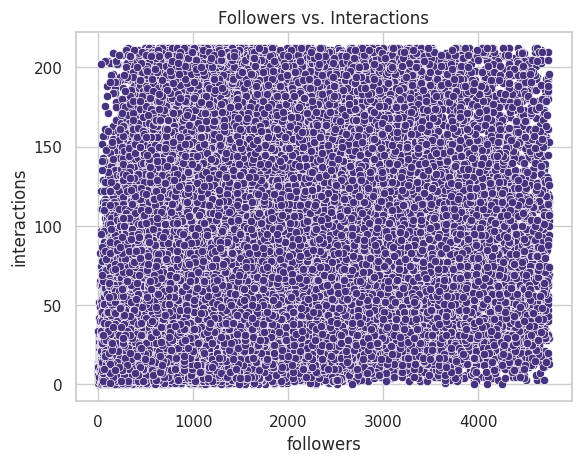

This plot indicates how follower count potentially influences the level of interactions on posts.


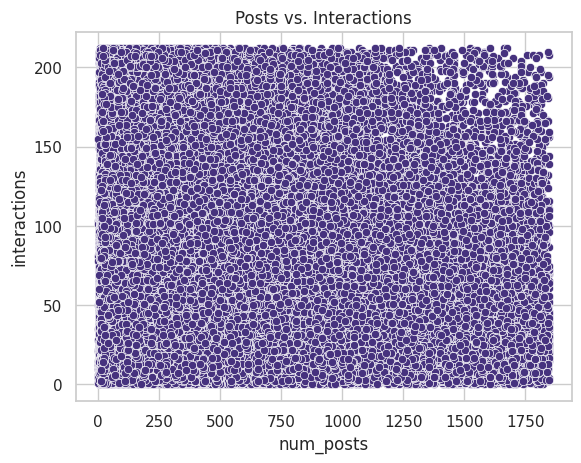

Analyzing the correlation between the number of posts and interactions to determine if more frequent posting leads to more engagement.
EDA data saved to ../Data/Clean-Data/eda_data.csv


In [4]:
input_path = '../Data/Clean-Data/cleaned_data.csv'
output_path = '../Data/Clean-Data/eda_data.csv'
eda = perform_eda(input_path, output_path)

## 4. Feature Engineering
We create new features from text, time, and categorical data to enhance model performance.


In [5]:
feature_engenieering(
    filepath='../Data/Clean-Data/eda_data.csv',
    drop_columns=['id', 'description', 'interactions_trans'],
    numerical_features=['followers', 'num_posts', 'description_length'],
    dummy_columns=['category', 'day_of_week', 'time_of_day'],
    output_path='../Data/Clean-Data/df_to_model.csv'
)


Shape of the EDA data: (198600, 1039)
Final Data for Modeling Saved.
(198600, 1063)


,interactions,following,followers,num_posts,is_business_account,category_arts_&_culture,category_business_&_entrepreneurs,category_celebrity_&_pop_culture,category_diaries_&_daily_life,category_family,...,embedded_1014,embedded_1015,embedded_1016,embedded_1017,embedded_1018,embedded_1019,embedded_1020,embedded_1021,embedded_1022,embedded_1023
0,18,1597,0.082623,1.422300,True,False,True,False,False,False,...,0.140299,-1.178756,-0.408933,-1.456328,0.935372,0.214015,-0.108297,-0.461002,-0.453863,-0.006341
1,18,292,-0.776348,0.372987,False,False,False,False,True,False,...,0.855364,-0.489793,-0.206234,-0.324326,-0.124099,0.321386,0.627285,0.248052,0.435962,0.612941
2,13,737,4.830477,2.544384,False,False,False,False,False,False,...,1.020114,0.405854,-0.018507,0.441405,0.582225,0.617475,-0.021549,-0.832010,-0.189848,-0.059992
3,206,705,0.555428,-0.479140,True,False,False,False,False,False,...,0.172005,-0.184960,-0.031137,-0.228795,0.615165,0.594781,0.464213,-0.175168,-0.210607,0.435912
4,87,666,-0.235469,-0.969758,True,False,False,False,True,False,...,0.393740,-0.493722,0.044641,-0.812091,0.551431,0.193551,0.706839,0.678754,-0.375888,0.170854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198595,75,312,0.650731,-0.681021,False,False,False,False,True,False,...,-0.032969,-0.178786,0.645651,0.252737,0.004960,0.628767,0.273474,-0.638773,-0.479751,-0.004659
198596,76,312,0.650731,-0.681021,False,False,False,False,False,False,...,0.575849,0.069304,-0.190815,-0.519745,0.261983,0.052918,0.423858,-0.013175,0.395566,-0.263487
198597,39,1006,0.474977,-0.011996,False,False,False,False,True,False,...,0.361927,-0.307513,-0.115363,-0.879502,0.440931,0.929510,0.488735,-0.528347,0.112330,-0.724037
198598,53,4400,0.262091,1.103046,True,False,False,False,True,False,...,0.634504,0.195251,-0.055174,-1.549992,0.635919,0.860611,0.503279,0.418480,0.183092,-0.238285


## 5. Data Preprocessing
We scale the data and split it into training and testing sets.


In [6]:
data = '../Data/Clean-Data/df_to_model.csv'
preprocess_data_for_modeling(data)

Scaled Training Data:
[[0.11153243 0.22917984 0.1256091  ... 0.50519574 0.2772295  0.43827314]
 [0.11924686 0.06198608 0.07417434 ... 0.69187891 0.57958675 0.36298413]]
Preprocessed data saved.


## 6. Model Selection
We train multiple models including XGBoost, Random Forest, and Neural Networks.


In [7]:
X_train_scaled = '../Data/Clean-Data/X_train_scaled.csv'
X_test_scaled = '../Data/Clean-Data/X_test_scaled.csv'
y_train = '../Data/Clean-Data/y_train.csv'
y_test = '../Data/Clean-Data/y_test.csv'
model_evaluation_and_selection(X_train_scaled, X_test_scaled, y_train, y_test)

XGBoost Model Performance:
Mean Absolute Error (MAE): 25.99019013425656
Mean Squared Error (MSE): 1273.8892189650771
R-squared: 0.46286845207214355

Random Forest Model Performance:
Mean Absolute Error (MAE): 29.127546966249625
Mean Squared Error (MSE): 1545.7725852326744
R-squared: 0.34822964581992366

Gradient Boosting Model Performance:
Mean Absolute Error (MAE): 26.806151479689895
Mean Squared Error (MSE): 1326.5892340825317
R-squared: 0.4406476455789252



/home/danicoco/Escritorio/IronHack-DataAnalysis/8. week-eight/project/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724323199.071031   22033 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-22 12:39:59.073692: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to downloa

  58/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step 

2024-08-22 12:56:54.920565: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 168730560 exceeds 10% of free system memory.


1242/1242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
TensorFlow Neural Network Model Performance:
Mean Absolute Error (MAE): 28.95284595470294
Mean Squared Error (MSE): 1474.1234964620423
R-squared: 0.378440260887146

Scaler saved successfully!
Best model (XGBoost) saved as 'model.pkl'
Model loaded successfully for verification!
The best model based on R-squared is: XGBoost with R2: 0.46286845207214355
Model and scaler saved successfully.


('XGBoost',
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...))

In [8]:
X_train_scaled = '../Data/Clean-Data/X_train_scaled.csv'
X_test_scaled = '../Data/Clean-Data/X_test_scaled.csv'
y_train = '../Data/Clean-Data/y_train.csv'
y_test = '../Data/Clean-Data/y_test.csv'
#train_and_evaluate_models(X_train_scaled,X_test_scaled,y_train,y_test)

## 7. Model Evaluation and Hyperparameter Tuning and Save Model and Scaler

We fine-tune our models and select the best one based on performance metrics and save the best performing model and the scaler for future use or deployment.


In [9]:
X_train_scaled = '../Data/Clean-Data/X_train_scaled.csv'
X_test_scaled = '../Data/Clean-Data/X_test_scaled.csv'
y_train = '../Data/Clean-Data/y_train.csv'
y_test = '../Data/Clean-Data/y_test.csv'
#best_model_name, best_params = hyperparameter_tuning_and_evaluation(X_train_scaled, X_test_scaled, y_train, y_test)